# YAPAY ZEKAYA GİRİŞ:

**GENEL SINIFLANDIRMA**

-Dar Yapay Zeka: Belirli bir problemi çözmeye yönelik

-Genel Yapay Zeka: Birçok farklı problemi çözmede insan kadar yetkin

-Süper Yapay Zeka: Bilinç sahibi.

Klasik makine öğrenmesinde, makineye sınırlı miktarda veriyi vererek ve aynı zamanda öznitelik çıkarımını da biz yaparak onun sınıflandırmayla sonucu bulmasını beklerken, derin öğrenmede ise bol miktarda veri vererek öznitelik çıkarımı+Sınıflandırmayı kendisi yaparak sonucu bulmasını bekleriz.


**YAPAY ZEKA ALGORİTMALARI**

REGRESYON ANALİZİ:

Bağımlı ve bağımsız değişkenler arasındaki sayısal ilişkiyi incelemek amacıyla kullanılan bir yöntem, regresyon modelinde bağımlı değişken tipik olarak y, bağımsız değişken ise x ile gösterilmektedir.

Bir tane bağımlı ve bir tane bağımsız değişken var ise, basit regresyon analizi

Bir tane bağımlı birden fazla bağımsız var ise: Çoklu regresyon analizi

Birden fazla bağımlı değişken var ise: Çok değişkenli regresyon analizi

Değişkenler arasındaki ilişki doğrusal ise: Doğrusal(lineer) regresyon analizi

Değişkenler arasındaki ilişki doğrusal değilse: Eğrsel(Doğrusal olmayan, non-lineer) regresyon analizi
y=a+bx+€
€=rastlantısal hata terimi;bağımlı değişkenin belli bir hata içerdiği varsayılır, bağımsız değişkende hata yoktur.


Lojistik Regresyon: Bağımlı değişken sürekli değerler yerine kesikli değerler alıyorsa,

Binomial Lojistik reg: Bağımlı değişken sadece iki farklı değerden birini alıyorsa(Doğru/Yanlış, Var/Yok)

Multinomial Lojistik reg: Bağımlı değişken ikiden fazla değerden herhangi birini alıyorsa(az/orta/çok)

Zaman serisi analizi;
basit bir regresyon modelinde y=a+bx+€,
x:bağımsız değişkeni t, yani zaman olursa..
 


Regülarizasyon,overfitting problemiyle mücadele etmek amacıyla uygulanır.

--Overfitting:İstatistikte, aşırı uyma,üretilen bir analizin veri kümesinde aşırı oranda uyum göstermesi, dolayısıyla bu veri kümesinde yer almayan yeni verilere uyum sağlayamaması problemidir.

Underfitting:Bir makine öğrenme algoritmasının veya bir modelin verilerin temelindeki eğilimi yakalayamaması durumunda ortaya çıkan durumdur.Modelin eğitim verilerinden yeterince öğrenemediği durumdur.

lasso,ridge,elastic


Standardisatioin(z-score normalization)
Xstand= (x-mean(x))/standard deviation(x) //1 ve 3.bölgede oluşur veri seti.

Max-Min Normalization (gürültülü veri için sıkıntılı, veri bir yere sıkışabilir)
Xnorm= (x-min(x))/ max(x)-min(x) # 1.bölgede 0ve1 arasında oluşur veri seti.

MDS- Çok Boyutlu Ölçeklendirme.Amaç: Çok sayıda özniteliği olan nesnelerin birbirlerine olan benzerliklerine(hatta mümkünse mesafelerine) göre 2 boyutlu uzayda(yani kağıt üzerinde) haritalanması.

In [6]:
#Makine Öğrenmesi
#Regresyon

import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import numpy as np

#Sklearn
from sklearn.linear_model import LinearRegression

In [7]:
df=pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv",sep=";") #sep varsayılanı "," 'dür. veri setimiz ; olduğu için sep belirtmek zorundayız.
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


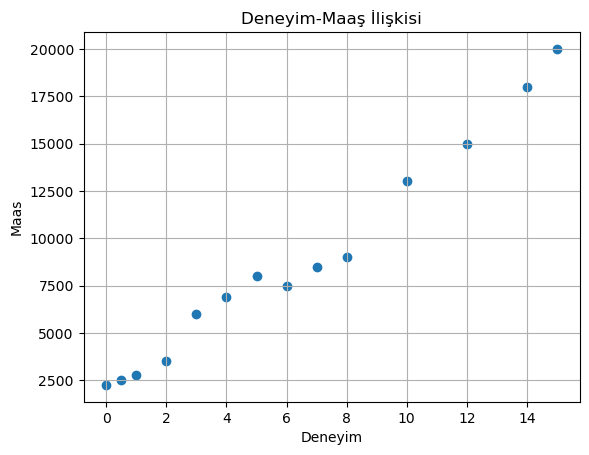

In [8]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim")
plt.ylabel("Maas")
plt.title("Deneyim-Maaş İlişkisi")
plt.grid(True)
plt.show()

In [9]:
lr=LinearRegression()

#data içerisinde bulunan maaş ve deneyim sütunlarını numpy array çevir
x=df.deneyim.values.reshape(-1,1)
y=df.maas.values.reshape(-1,1)

lr.fit(x,y)


LinearRegression()

In [10]:

#y eksenini kestiği nokta(intercept)
b0=lr.intercept_
print("b0",b0)

#eğim(slope) bulunması
b1=lr.coef_
print("b1",b1)

b0 [1663.89519747]
b1 [[1138.34819698]]


0 yıl deneyimi olan birisi 1663 lira alırken her 1 yıl deneyimin maaşa etkisi 1138 liradır gibi bir sonuca denk gelmektedir.
maaş=1663 +deneyim*1138

In [12]:
deneyim=11
maas_yeni=1663+deneyim*1138
print(maas_yeni)

sonuc=lr.predict(np.array([deneyim]).reshape(1,-1))
print("11 yıllık deneyime sahip birinin maaşı:",sonuc)


14181
11 yıllık deneyime sahip birinin maaşı: [[14185.72536421]]


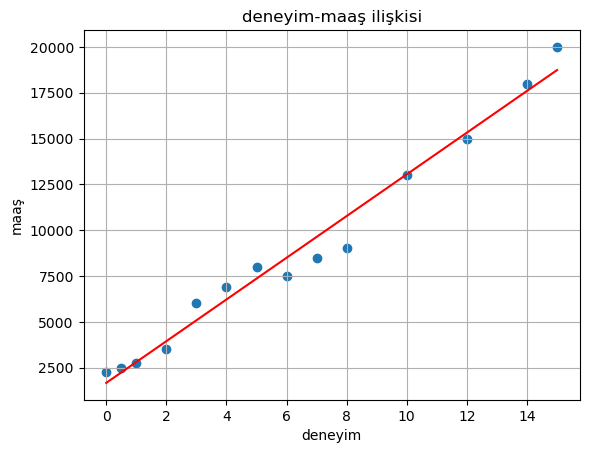

In [16]:
array=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)
plt.figure()
plt.scatter(x,y)

y_head=lr.predict(array) #y_head=maaş

plt.plot(array,y_head,color="red")
plt.xlabel("deneyim")
plt.ylabel("maaş")
plt.title("deneyim-maaş ilişkisi")
plt.grid(True)
plt.show()

In [18]:
#Çoklu Doğrusal Regresyon,(ikiden fazla değişken)

df2=pd.read_csv("coklu_dogrusal_regresyon_veriseti_20220209.csv",sep=";")
df2.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [21]:
x=df2.iloc[:,[0,2]].values #deneyim ve yaş bağımsız değişkenler
y=df2.iloc[:,[1]].values # maaş bağımlı değişken
lr2=LinearRegression()
lr2.fit(x,y)

LinearRegression()

In [24]:
test1=np.array([[10,35]]) #deneyim=10 yaş=35
print(lr2.predict(test1))

test2=np.array([[5,35]]) #deneyim=5 yaş=35
print(lr2.predict(test2))

[[11046.35815877]]
[[3418.85455609]]


In [27]:
#Polinomsal reg

df3=pd.read_csv("polinomsal_regresyon_veriseti_20220209.csv",sep=";")
df3.head(10)

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

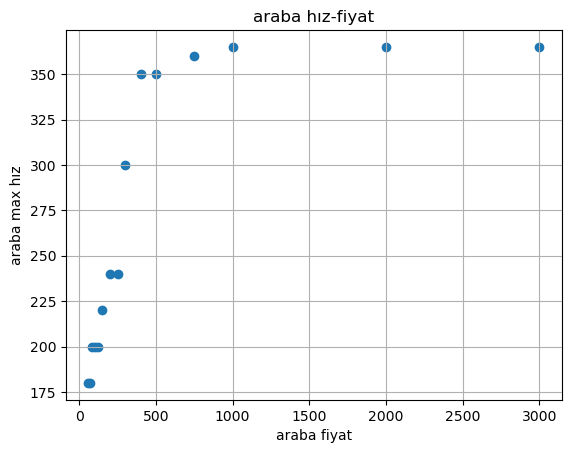

In [29]:
x=df3.araba_fiyat.values.reshape(-1,1)
y=df3.araba_max_hiz.values.reshape(-1,1)
plt.scatter(x,y)
plt.xlabel("araba fiyat")
plt.ylabel("araba max hız")
plt.title("araba hız-fiyat")
plt.grid(True)
plt.show()


In [31]:
#öncelikle yine de bir doğrusal regresyonu deneyelim
lr3=LinearRegression()
lr3.fit(x,y)



LinearRegression()

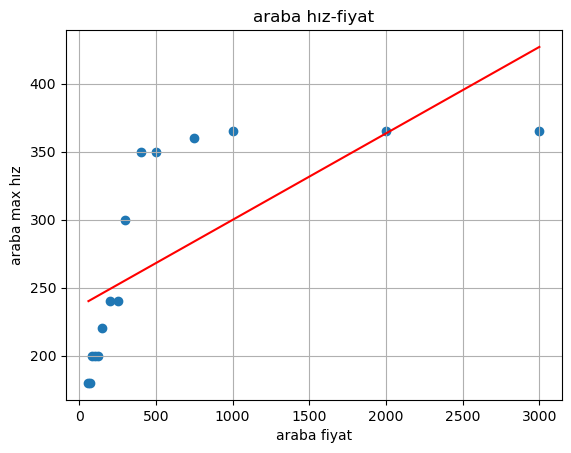

10 milyon liralık arabanın hız tahmini:  [[871.66401826]]


In [33]:
y_pred=lr3.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.xlabel("araba fiyat")
plt.ylabel("araba max hız")
plt.title("araba hız-fiyat")
plt.grid(True)
plt.show()
araba_fiyat=10000

sonuc=lr3.predict(np.array([araba_fiyat]).reshape(1,-1))
print("10 milyon liralık arabanın hız tahmini: ",sonuc)

modelin yanlış olduğu bariz gözükmektedir.

In [34]:
polinom_reg=PolynomialFeatures(degree=4) #4.dereceden polinom yap

x_pol=polinom_reg.fit_transform(x)
x_pol

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [35]:
lr=LinearRegression()
lr.fit(x_pol,y)

LinearRegression()

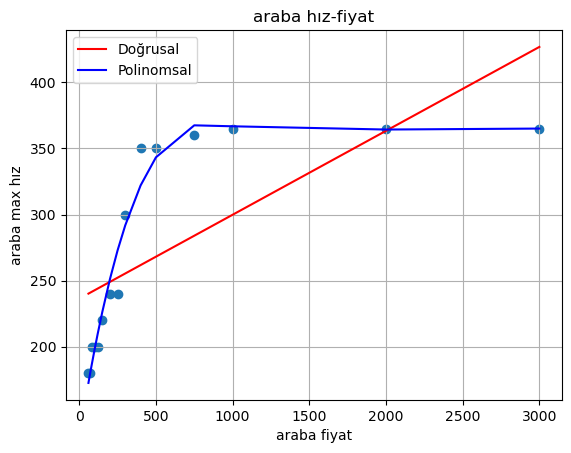

In [36]:
y_pred2=lr.predict(x_pol)
plt.scatter(x,y)
plt.plot(x,y_pred,color="red",label="Doğrusal")
plt.plot(x,y_pred2,color="blue",label="Polinomsal")
plt.legend()
plt.xlabel("araba fiyat")
plt.ylabel("araba max hız")
plt.title("araba hız-fiyat")
plt.grid(True)
plt.show()


**REGRESYON MODELLERİNİN DEĞERLENDİRİLMESİ**

R kare Nedir?
R kare, regresyonda en yaygın olarak bilinen değerlendirme ölçütlerinden biridir. R kare, regresyon denklemi ile belirlenen bağımlı değişkenlerin toplam değişkenliğe oranıdır. R karenin en yaygın yorumu, regresyon modelinin gözlemlenen verilere ne kadar uyduğudur. Örneğin, %60'lık bir R kare, verilerin %60'ının regresyon modeline uyduğunu ortaya koymaktadır. R kare yükseldikçe model için daha iyi bir uyumu gösterir.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df=pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv",sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [3]:
x=df.deneyim.values.reshape(-1,1)
y=df.maas.values.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [4]:
pol_reg=PolynomialFeatures(degree=2)
x_polinom=pol_reg.fit_transform(x)

poly_reg=LinearRegression()
poly_reg.fit(x_polinom,y)

LinearRegression()

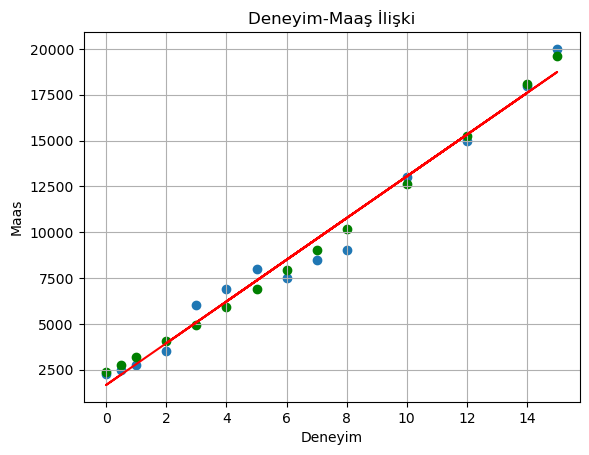

In [8]:
y_pred_linear=lr.predict(x)
y_pred_poly=poly_reg.predict(x_polinom)

plt.scatter(df.deneyim,df.maas)
plt.plot(x,y_pred_linear,color="red",label="Doğrusal")
plt.scatter(x,y_pred_poly,color="green",label="Polinomsal")
plt.xlabel("Deneyim")
plt.ylabel("Maas")
plt.title("Deneyim-Maaş İlişki")
plt.grid(True)
plt.show()

In [9]:
print("Doğrusal regresyon R kare: {}",r2_score(y,y_pred_linear))
print("Polinomsal regresyon R kare: {}",r2_score(y,y_pred_poly))

Doğrusal regresyon R kare: {} 0.9775283164949902
Polinomsal regresyon R kare: {} 0.9854449464578782
